# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [514]:
import pandas as pd
import numpy as np
import requests
import os

In [515]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [516]:
# Use the Requests library to download the image-predictions.tsv file from the Udacity server and save it in the working directory with the name image_predictions.tsv.
folder_name = './'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

image_predictions = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open(os.path.join(folder_name, image_predictions.url.split('/')[-1]), mode='wb') as file:
    file.write(image_predictions.content)

In [517]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [518]:
import tweepy
import json
import time

In [5]:
# Twitter API Keys from keys.txt
with open('keys.txt', 'r') as file:
    consumer_key = file.readline().strip()
    consumer_secret = file.readline().strip()
    access_token = file.readline().strip()
    access_secret = file.readline().strip()

In [18]:
# Query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = time.time()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in twitter_archive['tweet_id']:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = time.time()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [519]:
# Open the tweet_json.txt file and read it line by line into a pandas DataFrame with tweet ID, retweet count, and favorite count.
tweet_json = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet_json.append(json.loads(line)) 

tweet_json = pd.DataFrame(tweet_json, columns=['id', 'retweet_count', 'favorite_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessment to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](https://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [520]:
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [521]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [522]:
tweet_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,6877,32875
1,892177421306343426,5178,28414
2,891815181378084864,3422,21362
3,891689557279858688,7078,35827
4,891327558926688256,7596,34270


In [523]:
# twitter_archive - info
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [524]:
# image_predictions - info
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [525]:
# tweet_json - info
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2321 non-null   int64
 1   retweet_count   2321 non-null   int64
 2   favorite_count  2321 non-null   int64
dtypes: int64(3)
memory usage: 54.5 KB


In [526]:
# twitter_archive - describe
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [527]:
# image_predictions - describe
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [528]:
# tweet_json - describe
tweet_json.describe()

,id,retweet_count,favorite_count
count,2.321000e+03,2321.000000,2321.000000
mean,7.418024e+17,2427.307626,6873.004739
std,6.815545e+16,4107.536896,10669.510686
min,6.660209e+17,0.000000,0.000000
25%,6.782555e+17,488.000000,1198.000000
50%,7.182346e+17,1132.000000,2981.000000
75%,7.986440e+17,2805.000000,8396.000000
max,8.924206e+17,69407.000000,141581.000000


In [529]:
# Look for duplicate values in twitter_archive, image_predictions, and tweet_json
twitter_archive.duplicated().sum(), image_predictions.duplicated().sum(), tweet_json.duplicated().sum()

(0, 0, 0)

In [530]:
# Look for missing values in twitter_archive
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [531]:
# Look for missing values in image_predictions
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [532]:
# Look for missing values in tweet_json
tweet_json.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [533]:
# Look for invalid values in twitter_archive - rating_denominator
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [534]:
# Look for invalid values in twitter_archive - rating_numerator
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [535]:
# Check the names of the dogs in twitter_archive
twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [536]:
# Check for duplicated tweet_id in twitter_archive and image_predictions
twitter_archive['tweet_id'].duplicated().sum(),  image_predictions['tweet_id'].duplicated().sum()

(0, 0)

In [537]:
# Check for duplicated jpg_url in image_predictions
image_predictions['jpg_url'].duplicated().sum()

66

In [538]:
# Check for duplicated id in tweet_json
tweet_json['id'].duplicated().sum()

0

In [539]:
# Check for invalid values in tweet_json - retweet_count
tweet_json['retweet_count'].value_counts()

644     6
192     5
365     5
184     5
587     5
       ..
328     1
6555    1
4137    1
2831    1
687     1
Name: retweet_count, Length: 1628, dtype: int64

In [540]:
# Check if all image predictions are about dogs in image_predictions - p1_dog, p2_dog, p3_dog using query
image_predictions.query('p1_dog == False and p2_dog == False and p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


### Quality issues
1. In the `twitter_archive` table, the `timestamp` column is a string, not a datetime object.
2. In the `twitter_archive` table, these columns have missing values: `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`.
3. The rating denominators are not all 10.
4. The dog names are not all correct, they contain "a", "an", "the", "None", etc.
5. In the `twitter_archive` table, the `source` column contains HTML tags.
6. In the `image_predictions` table, the `p1`, `p2`, and `p3` columns contain underscores instead of spaces.
7. In the `image_predictions` table, the `p1`, `p2`, and `p3` columns are not all lowercase.
8. In the `image_predictions` table, the `p1`, `p2`, and `p3` columns contain non-dog names, such as "web site", "bookcase", "desktop computer", etc.

### Tidiness issues
1. The stage of the dog (`doggo`, `floofer`, `pupper`, and `puppo` columns) in `twitter_archive` is in four columns, instead of one.
2. The data should be in one table, instead of three tables.
3. The columns `p1`, `p1_conf`, `p1_dog`, `p2`, `p2_conf`, `p2_dog`, `p3`, `p3_conf`, and `p3_dog` in the `image_predictions` table are not descriptive.

## Cleaning Data
In this section, clean **all** the issues you documented while assessing.

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [541]:
# Make copies of original pieces of data before cleaning
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

### Issue #1:

#### Define:
Convert the `timestamp` column in the `twitter_archive` table to a datetime object.

#### Code

In [542]:
# Convert the `timestamp` column in the `twitter_archive` table to a datetime object.
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [543]:
# Test
twitter_archive_clean['timestamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2356 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype              
--------------  -----              
2356 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 18.5 KB


### Issue #2:

#### Define
Drop the , `in_reply_to_user_id`,  `retweeted_status_user_id`, and `retweeted_status_timestamp` columns from the `twitter_archive` table.

#### Code

In [544]:
# Drop the , `in_reply_to_user_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` columns from the `twitter_archive` table.
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

### Issue #3:
#### Define
Change the rating denominators to 10 in the `twitter_archive` table where they are not 10.

#### Code

In [545]:
# Select where the rating denominator is not 10 and change it to 10
twitter_archive_clean.loc[twitter_archive_clean['rating_denominator'] != 10, 'rating_denominator'] = 10


#### Test

In [546]:
# Test if the rating denominator is not 10
twitter_archive_clean.query('rating_denominator != 10')

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #4:
#### Define
Replace the dog names that are not correct in the `twitter_archive` table. It looks like the names are in the text of the tweet, so we can use a regular expression to extract them.

In [547]:
# Value counts the names of the dogs in twitter_archive
twitter_archive_clean['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [548]:
# Find the names of the dogs that are not capitalized in twitter_archive and create a list
lower_cased_names =twitter_archive_clean[twitter_archive_clean['name'].str.islower()].name.value_counts().index.tolist()
# Append None to the list
lower_cased_names.append('None')
lower_cased_names

['a',
 'the',
 'an',
 'very',
 'just',
 'quite',
 'one',
 'getting',
 'actually',
 'mad',
 'not',
 'old',
 'life',
 'officially',
 'light',
 'by',
 'infuriating',
 'such',
 'all',
 'unacceptable',
 'this',
 'his',
 'my',
 'incredibly',
 'space',
 'None']

#### Code

<font color='red'>Based on the code above, we can see that lower cased names are not actual dog names</font>

In [549]:
# Replace the dog names that are lowercase letter
# Replace the names that start with a lowercase letter with name from text column where possible
twitter_archive_clean.loc[twitter_archive_clean['name'].str.contains('^[a-z]', regex=True), 'name'] = twitter_archive_clean['text'].str.extract('(?:This is|Meet|Say hello to|named|name is|Here we have) ([A-Z][a-z]+)', expand=True)

#### Test

In [550]:
# Find the names of the dogs that are not capitalized in twitter_archive and names non nan
twitter_archive_clean[twitter_archive_clean['name'].str.islower() & twitter_archive_clean['name'].notnull()].name.value_counts()

Series([], Name: name, dtype: int64)

In [551]:
# Test if the names that start with a lowercase letter are replaced
twitter_archive_clean['name'].value_counts().head(20)

None       745
Charlie     12
Lucy        11
Cooper      11
Oliver      11
Lola        10
Penny       10
Tucker      10
Bo           9
Winston      9
Sadie        8
Daisy        7
Toby         7
Bailey       7
Buddy        7
Milo         6
Stanley      6
Rusty        6
Jack         6
Leo          6
Name: name, dtype: int64

### Issue #5:
#### Define
Remove the HTML tags from the `source` column in the `twitter_archive` table.

#### Code

In [552]:
# Remove the html tags from the source column in twitter_archive
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace(r'<(?:a\b[^>]*>|/a>)', '')

/var/folders/_l/ydpvhml56w36510518gj11mh0000gn/T/ipykernel_64896/2181494590.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace(r'<(?:a\b[^>]*>|/a>)', '')


#### Test

In [553]:
# Test if the html tags are removed
twitter_archive_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue #6:
#### Define
Replace the underscores in the `p1`, `p2`, and `p3` columns in the `image_predictions` table with spaces.

#### Code

In [554]:
# Replace the underscores in the `p1`, `p2`, and `p3` columns in the `image_predictions` table with spaces.
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.replace('_', ' ')
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.replace('_', ' ')
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.replace('_', ' ')

#### Test

In [555]:
# Test if the underscores are replaced with spaces
image_predictions_clean['p1'].value_counts().head(10)

golden retriever      150
Labrador retriever    100
Pembroke               89
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy poodle             39
Pomeranian             38
cocker spaniel         30
Name: p1, dtype: int64

### Issue #7:
#### Define
Convert the `p1`, `p2`, and `p3` columns in the `image_predictions` table to lowercase.

#### Code

In [556]:
# Convert the `p1`, `p2`, and `p3` columns in the `image_predictions` table to lowercase.
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.lower()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.lower()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.lower()

#### Test

In [557]:
# Test if the `p1`, `p2`, and `p3` columns are converted to lowercase using isupper()
image_predictions_clean['p1'].str.isupper().sum(), image_predictions_clean['p2'].str.isupper().sum(), image_predictions_clean['p3'].str.isupper().sum()

(0, 0, 0)

### Issue #8:
#### Define
Remove the non-dog names from the `p1`, `p2`, and `p3` columns in the `image_predictions` table by removing the rows where the `p1_dog`, `p2_dog`, and `p3_dog` columns are False.

#### Code

In [558]:
# Remove the rows where the `p1_dog`, `p2_dog`, and `p3_dog` columns are False in the `image_predictions` table.
image_predictions_clean = image_predictions_clean.query('p1_dog == True or p2_dog == True or p3_dog == True')

#### Test

In [559]:
# Test if the rows where the `p1_dog`, `p2_dog`, and `p3_dog` columns are False are removed
image_predictions_clean.query('p1_dog == False and p2_dog == False and p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## Tidineess issues
### Issue #1:
#### Define
The `doggo`, `floofer`, `pupper`, and `puppo` columns in the `twitter_archive` table should be combined into one column.


#### Code

In [560]:
# Replace all the None values in the in doggo, floofer, pupper, and puppo columns with an empty string.
twitter_archive_clean['doggo'].replace('None', '', inplace=True)
twitter_archive_clean['floofer'].replace('None', '', inplace=True)
twitter_archive_clean['pupper'].replace('None', '', inplace=True)
twitter_archive_clean['puppo'].replace('None', '', inplace=True)

# Replace all the NAN values in the in doggo, floofer, pupper, and puppo columns with an empty string.
twitter_archive_clean['doggo'].replace(np.nan, '', inplace=True)
twitter_archive_clean['floofer'].replace(np.nan, '', inplace=True)
twitter_archive_clean['pupper'].replace(np.nan, '', inplace=True)
twitter_archive_clean['puppo'].replace(np.nan, '', inplace=True)

In [561]:
# Combine the dog stage columns in the `twitter_archive` table into one column.
twitter_archive_clean['dog_stage'] = twitter_archive_clean['doggo'] + twitter_archive_clean['floofer'] + twitter_archive_clean['pupper'] + twitter_archive_clean['puppo']

#### Test

In [562]:
# Test if the dog stage columns are combined into one column
twitter_archive_clean['dog_stage'].value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

<font style="color:red"> We can see that the `dog_stage` column has some values which are combined dog stages such as `doggopupper`, `doggopuppo` and `doggofloofer`. We will replace them with correct dog stage which is name stage separated with comma</font>

In [563]:
# Replace the empty strings in the dog_stage column with NaN
twitter_archive_clean['dog_stage'].replace('', np.nan, inplace=True)

In [564]:
# Replace the multiple dog stages with the correct dog stage
twitter_archive_clean.loc[twitter_archive_clean['dog_stage'] == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean['dog_stage'] == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean['dog_stage'] == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [565]:
# Test if the empty strings in the dog_stage column are replaced with NaN
twitter_archive_clean['dog_stage'].value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

<font style="color:red"> Finally, we will drop the `doggo`, `floofer`, `pupper`, and `puppo` columns</font>

In [566]:
# Drop the doggo, floofer, pupper, and puppo columns
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [567]:
# Test if the doggo, floofer, pupper, and puppo columns are dropped
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   tweet_id             2356 non-null   int64              
 1   timestamp            2356 non-null   datetime64[ns, UTC]
 2   source               2356 non-null   object             
 3   text                 2356 non-null   object             
 4   retweeted_status_id  181 non-null    float64            
 5   expanded_urls        2297 non-null   object             
 6   rating_numerator     2356 non-null   int64              
 7   rating_denominator   2356 non-null   int64              
 8   name                 2247 non-null   object             
 9   dog_stage            380 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(5)
memory usage: 184.2+ KB


### Issue #2:
#### Define
Merge the `twitter_archive` and `image_predictions` tables into one table, and then merge the `tweet_json` table into the new table.

#### Code

In [568]:
# Merge the `twitter_archive` and `image_predictions` tables into one table.
twitter_archive_master = pd.merge(twitter_archive_clean, image_predictions_clean, on='tweet_id', how='inner')

In [569]:
# Test if the `twitter_archive` and `image_predictions` tables are merged into one table
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 1750
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   tweet_id             1751 non-null   int64              
 1   timestamp            1751 non-null   datetime64[ns, UTC]
 2   source               1751 non-null   object             
 3   text                 1751 non-null   object             
 4   retweeted_status_id  65 non-null     float64            
 5   expanded_urls        1751 non-null   object             
 6   rating_numerator     1751 non-null   int64              
 7   rating_denominator   1751 non-null   int64              
 8   name                 1670 non-null   object             
 9   dog_stage            270 non-null    object             
 10  jpg_url              1751 non-null   object             
 11  img_num              1751 non-null   int64              
 12  p1                  

In [570]:
# Merge the `twitter_archive_master` and `tweet_json` tables into one table right on the `tweet_id` column and left on the `id` column.
twitter_archive_master = pd.merge(twitter_archive_master, tweet_json_clean, left_on='tweet_id', right_on='id', how='inner')

In [571]:
# Test if the `twitter_archive_master` and `tweet_json` tables are merged into one table
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1732 entries, 0 to 1731
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   tweet_id             1732 non-null   int64              
 1   timestamp            1732 non-null   datetime64[ns, UTC]
 2   source               1732 non-null   object             
 3   text                 1732 non-null   object             
 4   retweeted_status_id  57 non-null     float64            
 5   expanded_urls        1732 non-null   object             
 6   rating_numerator     1732 non-null   int64              
 7   rating_denominator   1732 non-null   int64              
 8   name                 1651 non-null   object             
 9   dog_stage            266 non-null    object             
 10  jpg_url              1732 non-null   object             
 11  img_num              1732 non-null   int64              
 12  p1                  

#### Test

In [572]:
# Test if the `twitter_archive_master` and `tweet_json` tables are merged into one table
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1732 entries, 0 to 1731
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   tweet_id             1732 non-null   int64              
 1   timestamp            1732 non-null   datetime64[ns, UTC]
 2   source               1732 non-null   object             
 3   text                 1732 non-null   object             
 4   retweeted_status_id  57 non-null     float64            
 5   expanded_urls        1732 non-null   object             
 6   rating_numerator     1732 non-null   int64              
 7   rating_denominator   1732 non-null   int64              
 8   name                 1651 non-null   object             
 9   dog_stage            266 non-null    object             
 10  jpg_url              1732 non-null   object             
 11  img_num              1732 non-null   int64              
 12  p1                  

### Issue #3:
#### Define
The columns `p1`, `p1_conf`, `p1_dog`, `p2`, `p2_conf`, `p2_dog`, `p3`, `p3_conf`, and `p3_dog` in the `image_predictions` table are not descriptive. Rename them to `prediction_1`, `prediction_1_confidence`, `prediction_1_is_dog`, `prediction_2`, `prediction_2_confidence`, `prediction_2_is_dog`, `prediction_3`, `prediction_3_confidence`, and `prediction_3_is_dog`.

#### Code

In [573]:
# The columns `p1`, `p1_conf`, `p1_dog`, `p2`, `p2_conf`, `p2_dog`, `p3`, `p3_conf`, and `p3_dog` in the `image_predictions` table are not descriptive. Rename them to `prediction_1`, `prediction_1_confidence`, `prediction_1_is_dog`, `prediction_2`, `prediction_2_confidence`, `prediction_2_is_dog`, `prediction_3`, `prediction_3_confidence`, and `prediction_3_is_dog`.

twitter_archive_master.rename(columns={'p1': 'prediction_1', 'p1_conf': 'prediction_1_confidence', 'p1_dog': 'prediction_1_is_dog', 'p2': 'prediction_2', 'p2_conf': 'prediction_2_confidence', 'p2_dog': 'prediction_2_is_dog', 'p3': 'prediction_3', 'p3_conf': 'prediction_3_confidence', 'p3_dog': 'prediction_3_is_dog'}, inplace=True)

#### Test

In [574]:
# Test if the columns `p1`, `p1_conf`, `p1_dog`, `p2`, `p2_conf`, `p2_dog`, `p3`, `p3_conf`, and `p3_dog` are renamed to `prediction_1`, `prediction_1_confidence`, `prediction_1_is_dog`, `prediction_2`, `prediction_2_confidence`, `prediction_2_is_dog`, `prediction_3`, `prediction_3_confidence`, and `prediction_3_is_dog`.

twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1732 entries, 0 to 1731
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   tweet_id                 1732 non-null   int64              
 1   timestamp                1732 non-null   datetime64[ns, UTC]
 2   source                   1732 non-null   object             
 3   text                     1732 non-null   object             
 4   retweeted_status_id      57 non-null     float64            
 5   expanded_urls            1732 non-null   object             
 6   rating_numerator         1732 non-null   int64              
 7   rating_denominator       1732 non-null   int64              
 8   name                     1651 non-null   object             
 9   dog_stage                266 non-null    object             
 10  jpg_url                  1732 non-null   object             
 11  img_num                  1732 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [575]:
# Save the `twitter_archive_master` table to a csv file named twitter_archive_master.csv
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [576]:
# Read the `twitter_archive_master` table from the csv file named twitter_archive_master.csv
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [577]:
# Display the `twitter_archive_master` table
twitter_archive_master

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,prediction_1_is_dog,prediction_2,prediction_2_confidence,prediction_2_is_dog,prediction_3,prediction_3_confidence,prediction_3_is_dog,id,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,...,True,pekinese,0.090647,True,papillon,0.068957,True,892177421306343426,5178,28414
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,...,True,malamute,0.078253,True,kelpie,0.031379,True,891815181378084864,3422,21362
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,...,False,labrador retriever,0.168086,True,spatula,0.040836,False,891689557279858688,7078,35827
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,...,True,english springer,0.225770,True,german short-haired pointer,0.175219,True,891327558926688256,7596,34270
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,...,True,irish terrier,0.116317,True,indian elephant,0.076902,False,891087950875897856,2545,17240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,NaN,...,True,rottweiler,0.243682,True,doberman,0.154629,True,666049248165822465,35,85
1728,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN,...,True,redbone,0.360687,True,miniature pinscher,0.222752,True,666044226329800704,113,241
1729,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN,...,True,malinois,0.138584,True,bloodhound,0.116197,True,666033412701032449,35,98
1730,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN,...,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True,666029285002620928,39,111


## Analysis and Visualization
### 1. The most common dog stage.

Our first analysis will be to see the common dog stage. We will use the `dog_stage` column to see the most common dog stage.

In [578]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


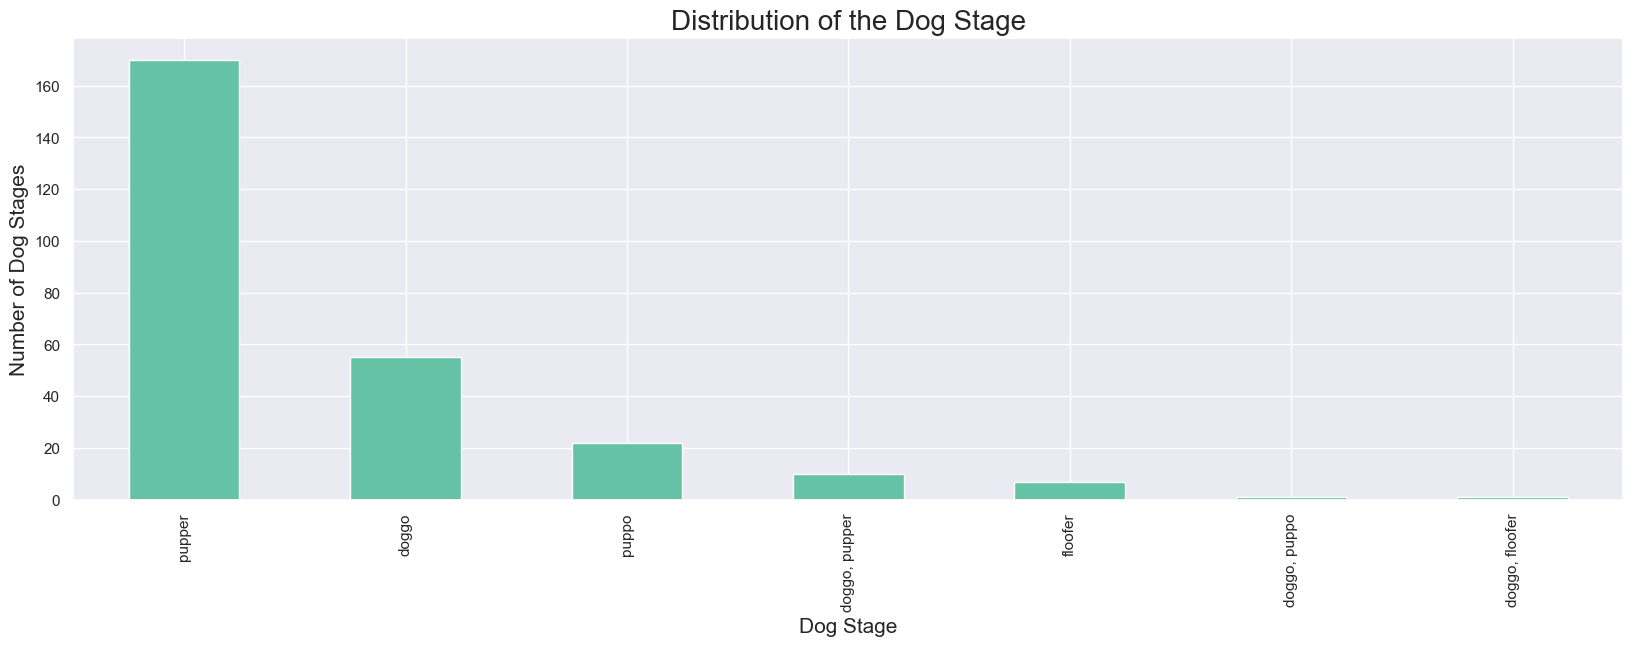

In [579]:
# Plot the distribution of the dog stage column
sns.set_style('darkgrid') # Set the style of the plot
sns.set_palette('Set2') # Set the color of the plot
twitter_archive_master['dog_stage'].value_counts().plot(kind='bar', title='Distribution of the Dog Stage Column', figsize=(20, 6))
plt.title('Distribution of the Dog Stage', fontsize=20)
plt.xlabel('Dog Stage', fontsize=15)
plt.ylabel('Number of Dog Stages', fontsize=15);

Our graph shows that the most common dog stage is pupper. The least common dog stage is floofer. However, there is an error because the dog stage is combined in some rows. We will fix this error in the next analysis.

create a tip with red color
> <font color='red' size="6"> While the code below, if you get an error saying *AttributeError: 'DataFrame' object has no attribute 'explode'*, you need to update your pandas version to a higher version. You can do this by running the following command in your terminal: `pip install pandas`</font>

In [580]:
# Split the dog_stage column into rows and create a new dataframe.
dog_stage_df  = twitter_archive_master.assign(dog_stage=twitter_archive_master['dog_stage'].str.split(', ')).explode('dog_stage')
dog_stage_df['dog_stage'].value_counts()

pupper     180
doggo       67
puppo       23
floofer      8
Name: dog_stage, dtype: int64

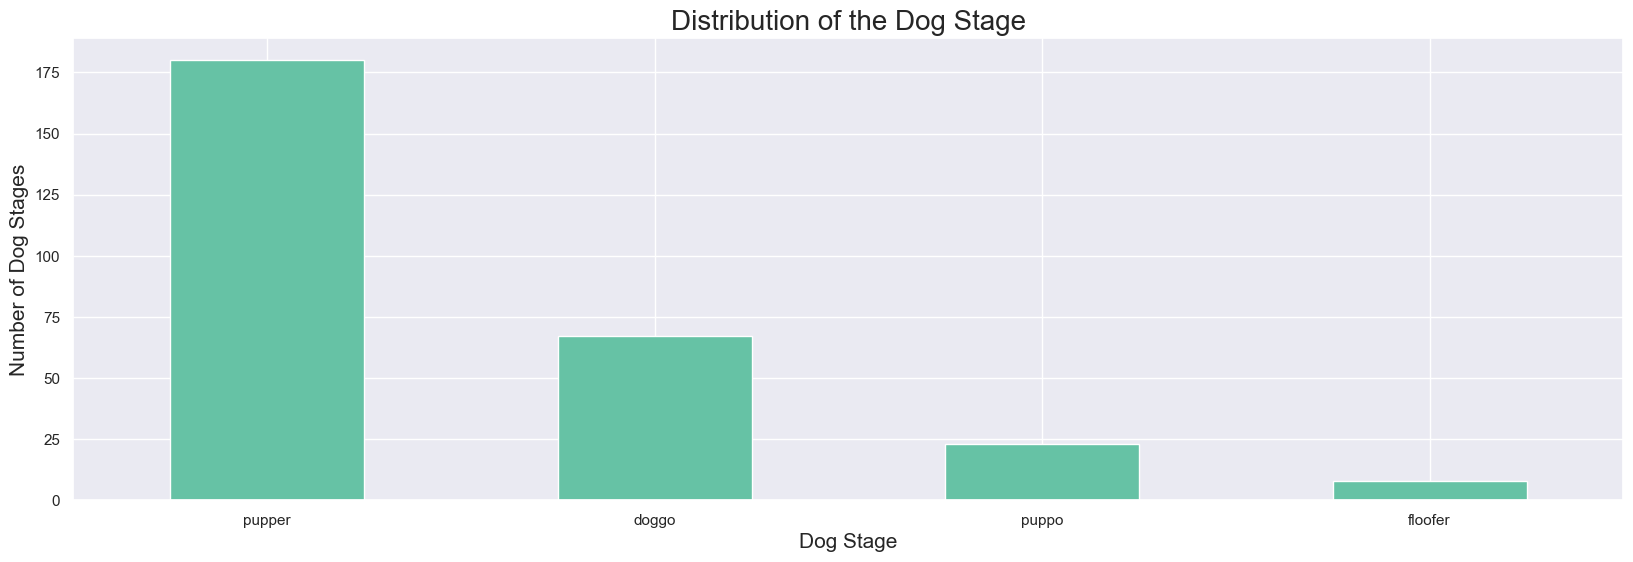

In [581]:
sns.set_style('darkgrid') # Set the style of the plot
sns.set_palette('Set2') # Set the color of the plot
dog_stage_df['dog_stage'].value_counts().plot(kind='bar', title='Distribution of the Dog Stage Column', figsize=(20, 6))
plt.title('Distribution of the Dog Stage', fontsize=20)
plt.xlabel('Dog Stage', fontsize=15)
plt.ylabel('Number of Dog Stages', fontsize=15)
# Put the x-axis labels on a 0 degree angle
plt.xticks(rotation=0);
# Save the plot as a png file named distribution_dog_stage.png with a resolution of 300 dpi
plt.savefig('distribution_dog_stage.png', dpi=300);

After fixing the error, we can see that the most common dog stage is pupper. The least common dog stage is floofer.

### 2. Average Retweet Count and Favorite Count by Dog Stage

In [582]:
# Create a new dataframe with columns timestamp, retweet_count, and favorite_count, dog_stage
retweet_favorite_df = dog_stage_df[['timestamp', 'retweet_count', 'favorite_count', 'dog_stage']]
retweet_favorite_df.head()

,timestamp,retweet_count,favorite_count,dog_stage
0,2017-08-01 00:17:27+00:00,5178,28414,NaN
1,2017-07-31 00:18:03+00:00,3422,21362,NaN
2,2017-07-30 15:58:51+00:00,7078,35827,NaN
3,2017-07-29 16:00:24+00:00,7596,34270,NaN
4,2017-07-29 00:08:17+00:00,2545,17240,NaN


In [583]:
# Sort the dataframe by timestamp and favorite_count in ascending order 
retweet_favorite_df = retweet_favorite_df.sort_values('timestamp', ascending=True)
retweet_favorite_df.head()

,timestamp,retweet_count,favorite_count,dog_stage
1731,2015-11-15 22:32:08+00:00,416,2229,NaN
1730,2015-11-15 23:05:30+00:00,39,111,NaN
1729,2015-11-15 23:21:54+00:00,35,98,NaN
1728,2015-11-16 00:04:52+00:00,113,241,NaN
1727,2015-11-16 00:24:50+00:00,35,85,NaN


In [584]:
# Select the rows where the dog_stage column is not NaN
retweet_favorite_df = retweet_favorite_df[retweet_favorite_df['dog_stage'].notnull()]
retweet_favorite_df

,timestamp,retweet_count,favorite_count,dog_stage
1483,2015-12-02 21:06:56+00:00,301,752,pupper
1481,2015-12-03 00:07:09+00:00,991,1934,pupper
1476,2015-12-03 03:21:00+00:00,639,1247,pupper
1471,2015-12-03 18:23:34+00:00,110,624,pupper
1465,2015-12-04 01:55:13+00:00,520,1140,pupper
...,...,...,...,...
35,2017-07-09 21:29:42+00:00,2458,17406,doggo
25,2017-07-15 23:25:31+00:00,2573,18011,pupper
13,2017-07-24 17:02:04+00:00,1853,12965,puppo
11,2017-07-25 01:55:32+00:00,8186,40855,puppo


/var/folders/_l/ydpvhml56w36510518gj11mh0000gn/T/ipykernel_64896/1022179404.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  retweet_favorite_df.groupby('dog_stage')['retweet_count', 'favorite_count'].mean().plot(kind='bar', title='Retweet Count and Favorite Count for Each Dog Stage', figsize=(20, 6))


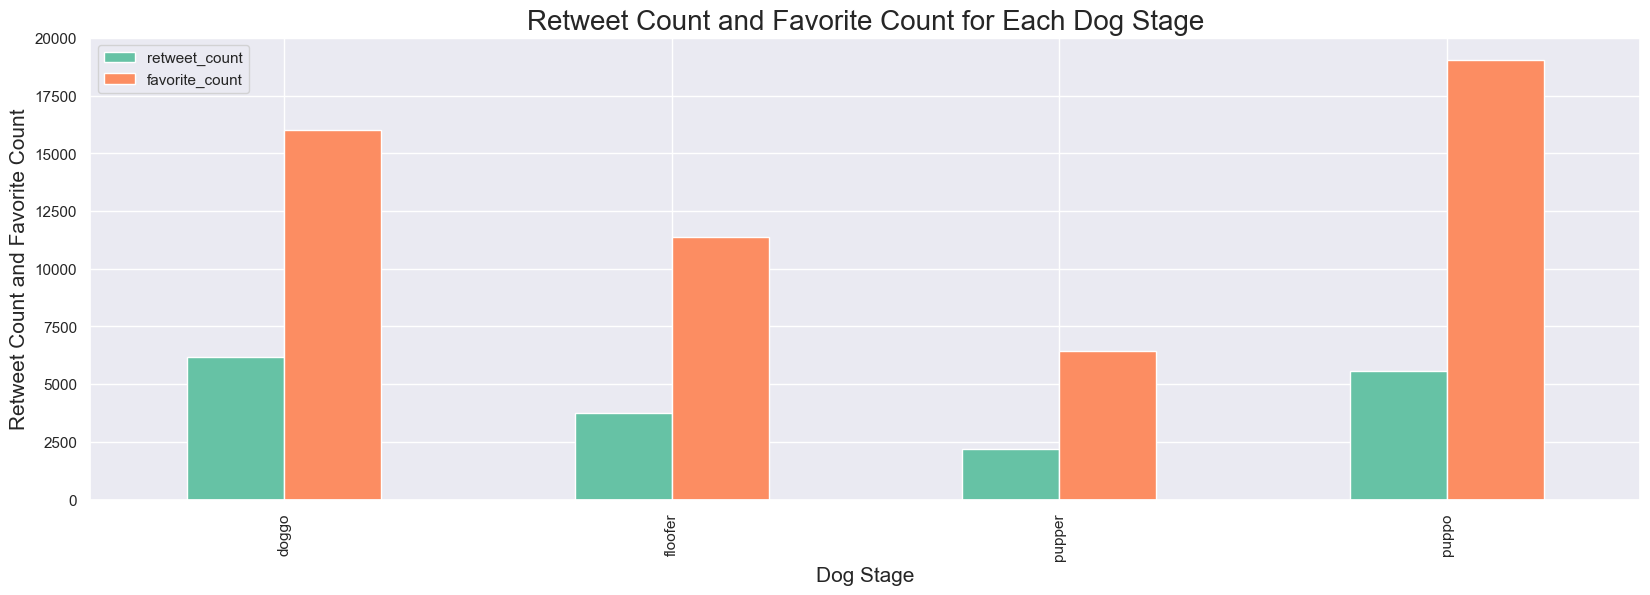

In [585]:
# Plot the retweet_count and favorite_count columns for each dog stage
sns.set_style('darkgrid') # Set the style of the plot
sns.set_palette('Set2') # Set the color of the plot
retweet_favorite_df.groupby('dog_stage')['retweet_count', 'favorite_count'].mean().plot(kind='bar', title='Retweet Count and Favorite Count for Each Dog Stage', figsize=(20, 6))
plt.title('Retweet Count and Favorite Count for Each Dog Stage', fontsize=20)
plt.xlabel('Dog Stage', fontsize=15)
plt.ylabel('Retweet Count and Favorite Count', fontsize=15);

Based on the analysis between retweet count and favorite count, we can see that the most retweeted dog stage is doggo. The most favorited dog stage is puppo. However, it is important to note that as the number of favorites increases, the number of retweets also increases.

In [586]:
# Extract year and month from the timestamp column and create a new column named year_month
twitter_archive_master['year_month'] = pd.to_datetime(twitter_archive_master['timestamp']).dt.to_period('M')
twitter_archive_master.head()

/var/folders/_l/ydpvhml56w36510518gj11mh0000gn/T/ipykernel_64896/2890677741.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  twitter_archive_master['year_month'] = pd.to_datetime(twitter_archive_master['timestamp']).dt.to_period('M')


,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,prediction_2,prediction_2_confidence,prediction_2_is_dog,prediction_3,prediction_3_confidence,prediction_3_is_dog,id,retweet_count,favorite_count,year_month
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,...,pekinese,0.090647,True,papillon,0.068957,True,892177421306343426,5178,28414,2017-08
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,...,malamute,0.078253,True,kelpie,0.031379,True,891815181378084864,3422,21362,2017-07
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,...,labrador retriever,0.168086,True,spatula,0.040836,False,891689557279858688,7078,35827,2017-07
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,...,english springer,0.225770,True,german short-haired pointer,0.175219,True,891327558926688256,7596,34270,2017-07
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,...,irish terrier,0.116317,True,indian elephant,0.076902,False,891087950875897856,2545,17240,2017-07


### 3. Average Retweet Count and Favorite Count Over Time

/var/folders/_l/ydpvhml56w36510518gj11mh0000gn/T/ipykernel_64896/2947499262.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  twitter_archive_master.groupby('year_month')['retweet_count', 'favorite_count'].mean().plot(kind='bar', title='Average of Retweet Count and Favorite Count for Each Month in Dataset', figsize=(20, 6))


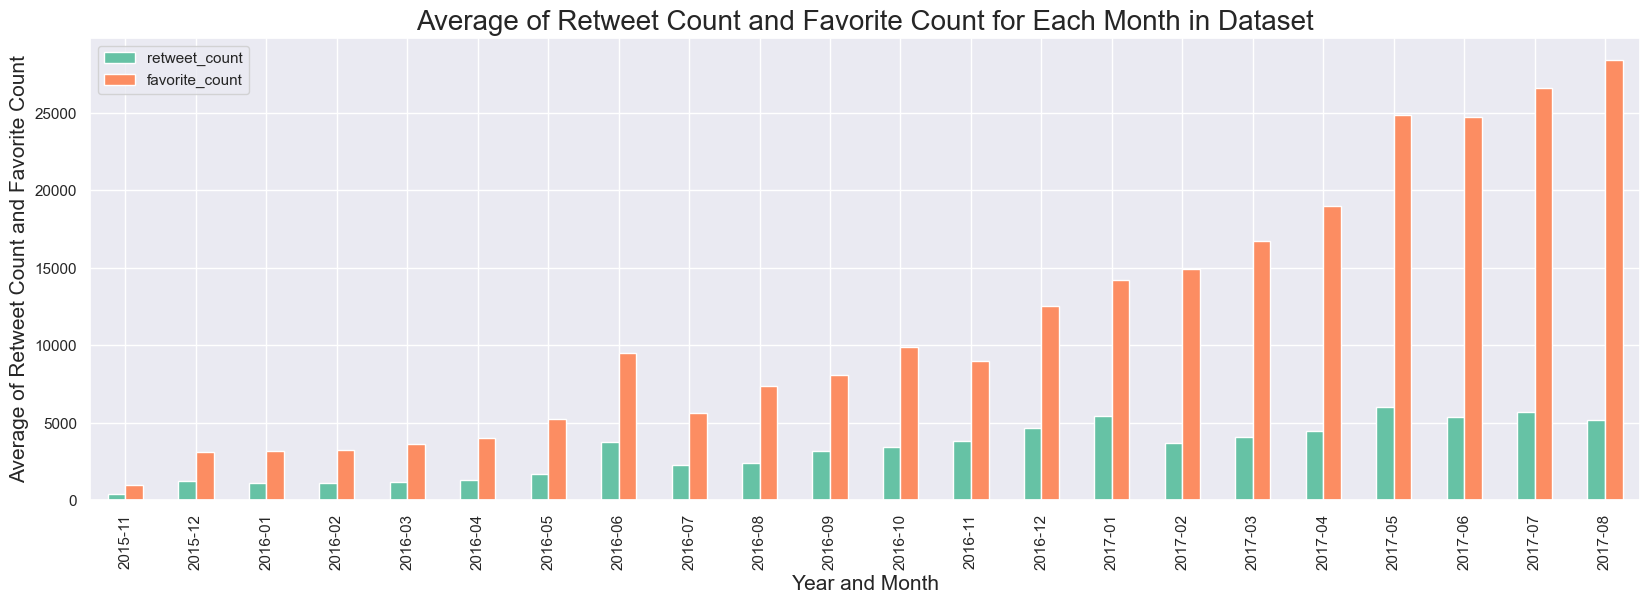

In [587]:
# Find average of the retweet_count and favorite_count columns for each year_month
sns.set_style('darkgrid') # Set the style of the plot
sns.set_palette('Set2') # Set the color of the plot
twitter_archive_master.groupby('year_month')['retweet_count', 'favorite_count'].mean().plot(kind='bar', title='Average of Retweet Count and Favorite Count for Each Month in Dataset', figsize=(20, 6))
plt.title('Average of Retweet Count and Favorite Count for Each Month in Dataset', fontsize=20)
plt.xlabel('Year and Month', fontsize=15)
plt.ylabel('Average of Retweet Count and Favorite Count', fontsize=15)

# Save the plot as a png file named average_retweet_favorite_count.png with a resolution of 300 dpi
plt.savefig('average_retweet_favorite_count.png', dpi=300);

As we can see, the average retweet count and favorite count are increasing over time. However, the average favorite count is increasing faster than the average retweet count. This means that people are favoriting tweets more than retweeting them. This could be because people are more likely to favorite tweets than retweet them, or because the WeRateDogs account is getting more followers over time.

><font color='red' size="6">Kindly if you get an error *module 'seaborn' has no attribute 'scatterplot'* please update your seaborn library to the latest version</font>

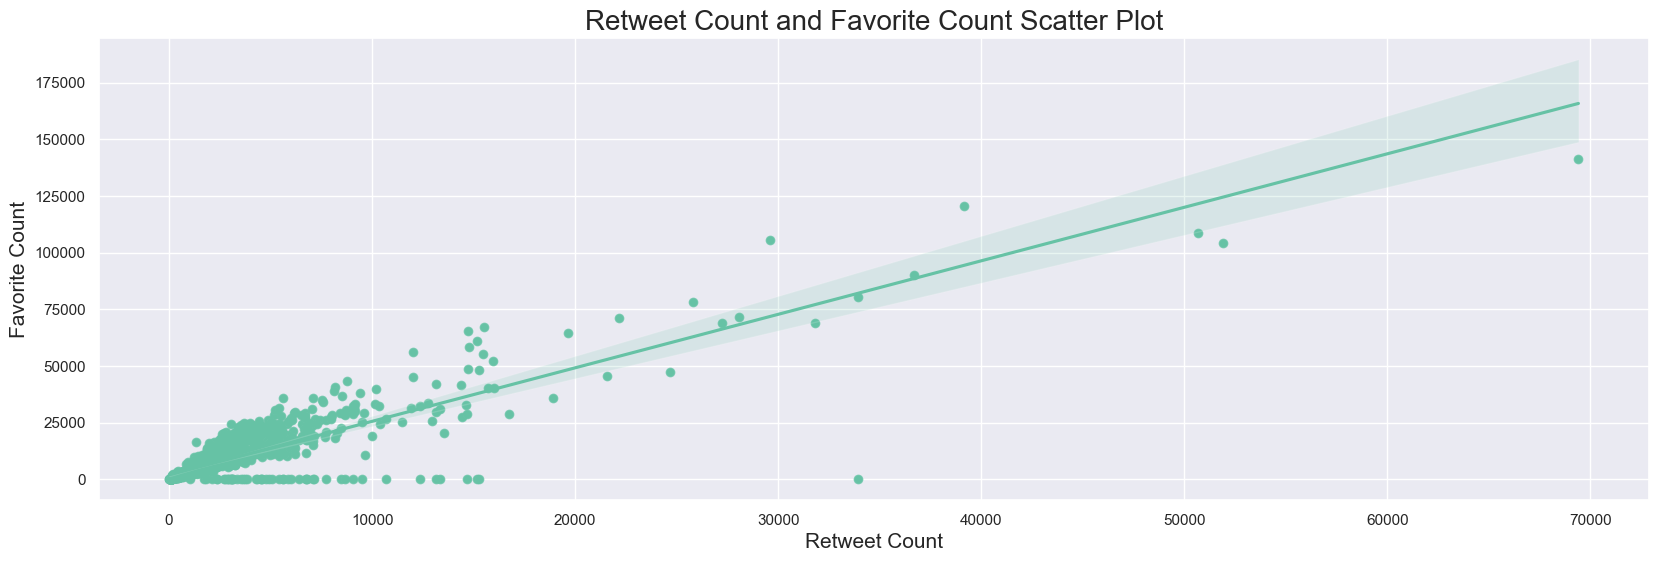

In [588]:
# Create a scatter plot of the retweet_count and favorite_count columns
plt.figure(figsize=(20, 6))
sns.set_style('darkgrid') # Set the style of the plot
sns.set_palette('Set2') # Set the color of the plot
sns.scatterplot(x='retweet_count', y='favorite_count', data=twitter_archive_master)
sns.regplot(x='retweet_count', y='favorite_count', data=twitter_archive_master)
plt.title('Retweet Count and Favorite Count Scatter Plot', fontsize=20)
plt.xlabel('Retweet Count', fontsize=15)
plt.ylabel('Favorite Count', fontsize=15)

# Save the plot as a png file named retweet_count_favorite_count_scatter_plot.png with a resolution of 300 dpi
plt.savefig('retweet_count_favorite_count_scatter_plot.png', dpi=300);


From the graph above, we can see that there is a correlation between the retweet count and favorite count. The more retweets a tweet gets, the more favorites it gets. This is expected because people who retweet a tweet are more likely to favorite it.

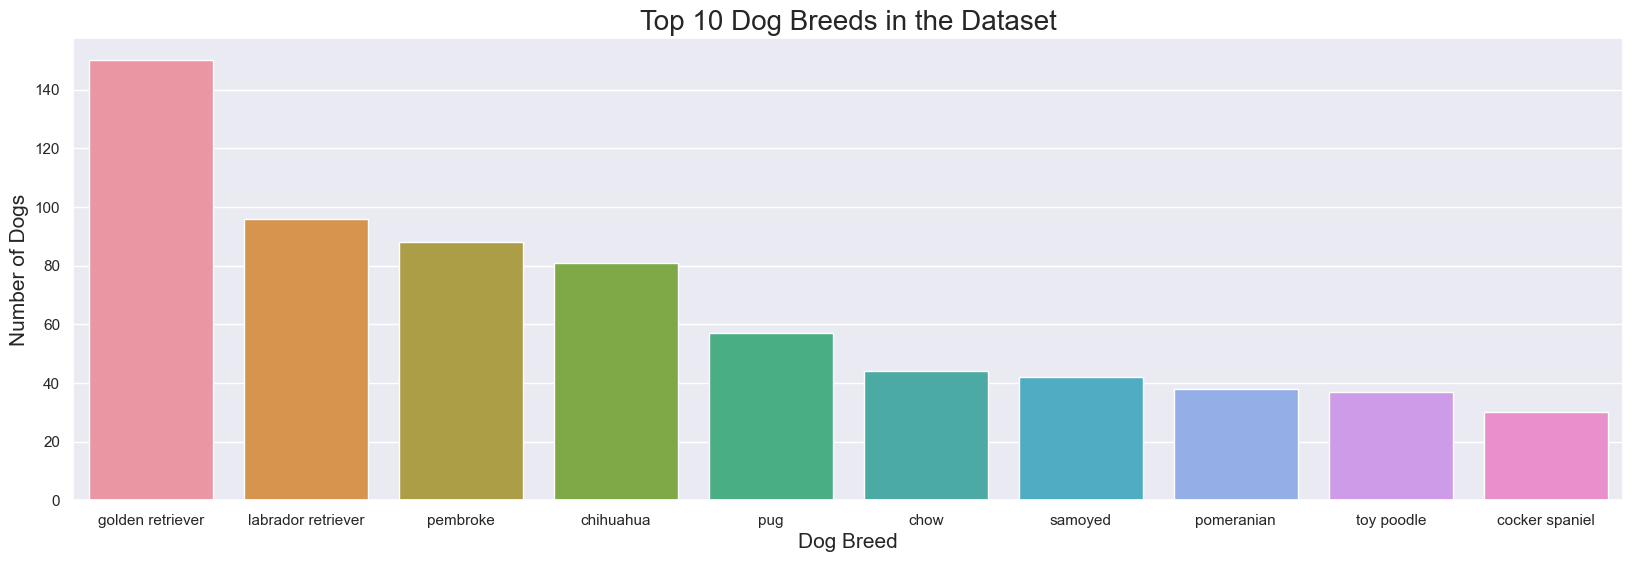

In [589]:
#Create a plot to show which dog breed is the most popular in the dataset. Limit the plot to the top 10 dog breeds. Using the seaborn library, create a bar plot with the x-axis as the dog breed and the y-axis as the number of dogs in the dataset.
plt.figure(figsize=(20, 6))
sns.set_style('darkgrid') # Set the style of the plot
sns.set_palette('Set2') # Set the color of the plot
sns.barplot(x=twitter_archive_master['prediction_1'].value_counts().index[:10], y=twitter_archive_master['prediction_1'].value_counts()[:10])
plt.title('Top 10 Dog Breeds in the Dataset', fontsize=20)
plt.xlabel('Dog Breed', fontsize=15)
plt.ylabel('Number of Dogs', fontsize=15);

# Save the plot as a png file named top_10_dog_breeds.png with a resolution of 300 dpi
plt.savefig('top_10_dog_breeds.png', dpi=300);


After analyzing and visualizing the data, we can see that the golden retriever is the most common dog breed.

### 4. How Does the Popular Breed of Dog Look Like?
In this analysis, we will see how the popular breed of dog looks like. We will use the `prediction_1` column to see the most common breed of dog. We will sort the dataset by favorite count and retweet count to see the most popular breed of dog.

We will then use the PIL library to open the image of the most popular breed of dog. We will then use the matplotlib library to display the image.

In [590]:
# Select the rows where the prediction_1 column is a Golden Retriever using the query method and assign the result to a new dataframe named golden_retriever_df
golden_retriever_df = twitter_archive_master.query('prediction_1 == "golden retriever"')
golden_retriever_df.head()

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,prediction_2,prediction_2_confidence,prediction_2_is_dog,prediction_3,prediction_3_confidence,prediction_3_is_dog,id,retweet_count,favorite_count,year_month
13,889531135344209921,2017-07-24 17:02:04+00:00,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,puppo,...,labrador retriever,0.013834,True,redbone,0.007958,True,889531135344209921,1853,12965,2017-07
15,888917238123831296,2017-07-23 00:22:39+00:00,Twitter for iPhone,This is Jim. He found a fren. Taught him how t...,NaN,https://twitter.com/dog_rates/status/888917238...,12,10,Jim,NaN,...,tibetan mastiff,0.120184,True,labrador retriever,0.105506,True,888917238123831296,3687,24876,2017-07
16,888804989199671297,2017-07-22 16:56:37+00:00,Twitter for iPhone,This is Zeke. He has a new stick. Very proud o...,NaN,https://twitter.com/dog_rates/status/888804989...,13,10,Zeke,NaN,...,labrador retriever,0.184172,True,english setter,0.073482,True,888804989199671297,3459,21815,2017-07
37,883482846933004288,2017-07-08 00:28:19+00:00,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,NaN,...,labrador retriever,0.032409,True,kuvasz,0.005501,True,883482846933004288,8099,39002,2017-07
39,883117836046086144,2017-07-07 00:17:54+00:00,Twitter for iPhone,Please only send dogs. We don't rate mechanics...,NaN,https://twitter.com/dog_rates/status/883117836...,13,10,None,NaN,...,labrador retriever,0.045948,True,kuvasz,0.002471,True,883117836046086144,5436,31609,2017-07


In [591]:
# Sort the golden_retriever_df dataframe by the favorite_count column in descending order
golden_retriever_df = golden_retriever_df.sort_values('favorite_count', ascending=False)
golden_retriever_df.head()

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,prediction_2,prediction_2_confidence,prediction_2_is_dog,prediction_3,prediction_3_confidence,prediction_3_is_dog,id,retweet_count,favorite_count,year_month
86,870374049280663552,2017-06-01 20:18:38+00:00,Twitter for iPhone,This is Zoey. She really likes the planet. Wou...,NaN,https://twitter.com/dog_rates/status/870374049...,13,10,Zoey,NaN,...,great pyrenees,0.099278,True,labrador retriever,0.032621,True,870374049280663552,22156,71287,2017-06
795,733109485275860992,2016-05-19 01:38:16+00:00,Twitter for iPhone,"Like father (doggo), like son (pupper). Both 1...",NaN,https://twitter.com/dog_rates/status/733109485...,12,10,None,"doggo, pupper",...,labrador retriever,0.042319,True,doormat,0.003956,False,733109485275860992,15252,48137,2016-05
434,795464331001561088,2016-11-07 03:14:10+00:00,Twitter for iPhone,Elder doggo does a splash. Both 13/10 incredib...,NaN,https://twitter.com/dog_rates/status/795464331...,13,10,None,doggo,...,chesapeake bay retriever,0.157927,True,soft-coated wheaten terrier,0.124684,True,795464331001561088,21578,45686,2016-11
165,846514051647705089,2017-03-28 00:07:32+00:00,Twitter for iPhone,This is Barney. He's an elder doggo. Hitches a...,NaN,https://twitter.com/dog_rates/status/846514051...,13,10,Barney,doggo,...,leonberg,0.065199,True,norfolk terrier,0.052955,True,846514051647705089,10202,39995,2017-03
37,883482846933004288,2017-07-08 00:28:19+00:00,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,NaN,...,labrador retriever,0.032409,True,kuvasz,0.005501,True,883482846933004288,8099,39002,2017-07


In [592]:
# Select the columns tweet_id, jpg_url, and favorite_count, prediction_1, and rating_numerator from the golden_retriever_df dataframe
golden_retriever_df = golden_retriever_df[['tweet_id', 'jpg_url', 'favorite_count', 'prediction_1', 'rating_numerator']]
golden_retriever_df.head()

,tweet_id,jpg_url,favorite_count,prediction_1,rating_numerator
86,870374049280663552,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,71287,golden retriever,13
795,733109485275860992,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,48137,golden retriever,12
434,795464331001561088,https://pbs.twimg.com/ext_tw_video_thumb/79546...,45686,golden retriever,13
165,846514051647705089,https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg,39995,golden retriever,13
37,883482846933004288,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,39002,golden retriever,5


In [593]:
# Select the first 5 rows from the golden_retriever_df dataframe and assign the result to a new dataframe named golden_retriever_df_5
golden_retriever_df_5 = golden_retriever_df.head()
golden_retriever_df_5

,tweet_id,jpg_url,favorite_count,prediction_1,rating_numerator
86,870374049280663552,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,71287,golden retriever,13
795,733109485275860992,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,48137,golden retriever,12
434,795464331001561088,https://pbs.twimg.com/ext_tw_video_thumb/79546...,45686,golden retriever,13
165,846514051647705089,https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg,39995,golden retriever,13
37,883482846933004288,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,39002,golden retriever,5


In [594]:
# Using the requests library, download the image from the jpg_url column and save it to a file named golden_retriever.jpg in the current working directory and display the image using the pillow library
import requests
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO

In [595]:
# Download the images from the jpg_url column and save them to a file named corresponding to the tweet_id
for index, row in golden_retriever_df_5.iterrows():
    response = requests.get(row['jpg_url'])
    img = Image.open(BytesIO(response.content))
    # Resize the image to 400x400 pixels
    img.thumbnail((400, 400))
    img.save('{}.jpg'.format(row['tweet_id']))

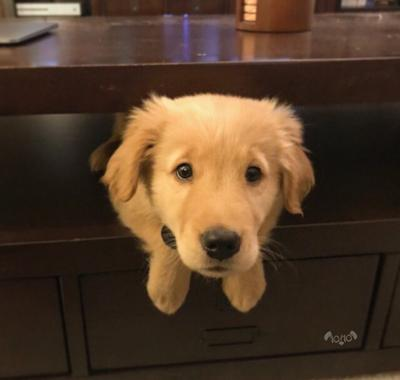

Tweet ID: 870374049280663552
Favorite Count: 71287
Dog Breed: golden retriever
Rating: 13
Image URL: https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg
 


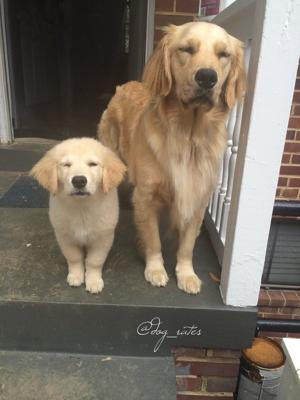

Tweet ID: 733109485275860992
Favorite Count: 48137
Dog Breed: golden retriever
Rating: 12
Image URL: https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg
 


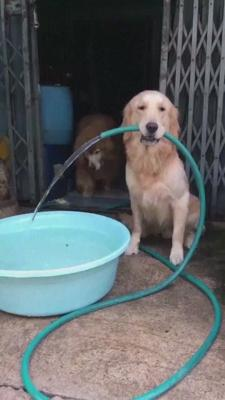

Tweet ID: 795464331001561088
Favorite Count: 45686
Dog Breed: golden retriever
Rating: 13
Image URL: https://pbs.twimg.com/ext_tw_video_thumb/795464066940764160/pu/img/jPkMMQXdydb7CqFX.jpg
 


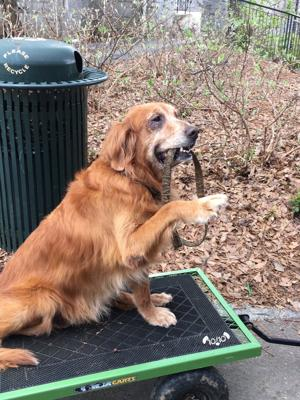

Tweet ID: 846514051647705089
Favorite Count: 39995
Dog Breed: golden retriever
Rating: 13
Image URL: https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg
 


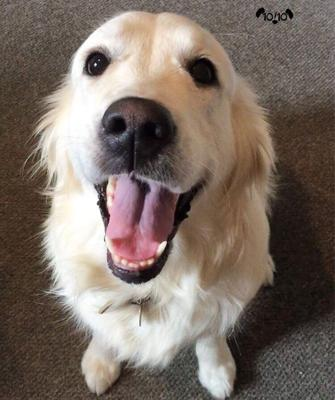

Tweet ID: 883482846933004288
Favorite Count: 39002
Dog Breed: golden retriever
Rating: 5
Image URL: https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg
 


In [596]:
# Display the images in a grid
from IPython.display import Image, display
for index, row in golden_retriever_df_5.iterrows():
    display(Image('{}.jpg'.format(row['tweet_id'])))
    print('Tweet ID: {}'.format(row['tweet_id']))
    print('Favorite Count: {}'.format(row['favorite_count']))
    print('Dog Breed: {}'.format(row['prediction_1']))
    print('Rating: {}'.format(row['rating_numerator']))
    print('Image URL: {}'.format(row['jpg_url']))
    print(' ')

    